In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from scipy.integrate import odeint

In [2]:
params = {}

def build_K(n, d, mean, cv):
    '''
    Builds connectivity matrix K for Kuramoto lattice.
    n : (n x n) coupled oscillators arranged in a squared lattice.
    d : range of connectivity between oscillators.
    mean : average coupling strength.
    cv : coefficient of variation w.r.t. mean in coupling strength (i.e., variability).
    '''
    N = n*n
    K = np.zeros((N, N))
    for i in np.arange(N):
        irow, icol = (int(i/n), int(i%n))
        topLeft = (irow-d, icol-d)
        for ii in np.arange(d*2+1):   # go through the whole dxd square surrounding element i.
            for jj in np.arange(d*2+1):
                row = (topLeft[0]+ii)
                col = (topLeft[1]+jj)
                if ( row >= 0 ) and ( row < n ) and ( col >= 0 ) and ( col < n ):
                    indx = int( row*n + col )
                    K[i, indx] = np.abs( np.random.normal(mean, mean*cv) )
    K *= np.logical_not(np.identity(N)).astype(int)
    return K

def f(y, t):
    '''
    Kuramoto oscillators ODE. Canonical phase model.
    y : phase; state variable.
    t : time.
    '''
    phi = np.tile(y, (params['N'][0], 1))
    df = params['W'][0] + np.sum( params['K'] * np.sin( phi.T - phi ), axis=0 )
    return df

In [3]:
@widgets.interact(N=widgets.IntSlider(20, min=2, max=50),
                  f=widgets.IntSlider(2, min=1, max=10), 
                  K=widgets.FloatSlider(0.2, min=0., max=1.),
                  K_var=widgets.FloatSlider(0.2, min=0., max=1.),
                  d=widgets.IntSlider(1, min=1, max=10))

def set_env_params(N=20, f=2, K=0.2, K_var=0.2, d=1):

    params['N'] = N*N,     
    params['W'] = np.ones(N*N) * 2*np.pi*f,
    params['K'] = build_K(N, d, K, K_var)   

interactive(children=(IntSlider(value=20, description='N', max=50, min=2), IntSlider(value=2, description='f',…

<IPython.core.display.Javascript object>


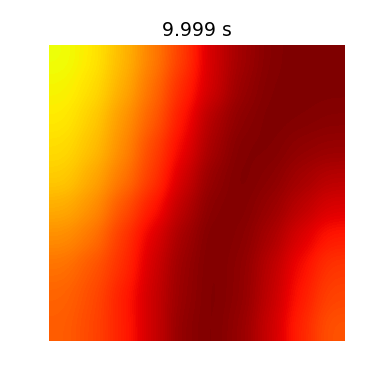

In [37]:
N = params['N'][0]
phi = 2*np.pi * np.random.random(size=N)

fig, ax = plt.subplots()
fig.set_size_inches(3,3)
ax.axis('off')
img = ax.imshow(np.sin(phi).reshape((int(np.sqrt(N)), int(np.sqrt(N)))), 
                vmin=-1, vmax=1, interpolation='gaussian', cmap='jet')  # hsv, hot
fig.canvas.draw()
plt.show(block=False)

dt = 1e-3
T = 10 # s
time = np.arange(0,T,dt)
for t in time:
    phi += f(phi, t)*dt
    data = np.sin(phi).reshape((int(np.sqrt(N)), int(np.sqrt(N))))
    try:
        img.set_data(data)
        img.axes.set_title(str(format(np.around(t,3), '.3f'))+' s')
        fig.canvas.draw()
        #plt.pause(0.0001)
    except KeyboardInterrupt:
        plt.close('all')
        break